<a href="https://colab.research.google.com/github/EsteArgen/Aspectos_Aritmeticos_Teoria_Ehrhart/blob/main/Geometr%C3%ADa_Diferencial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

**Aspectos Aritméticos de la Teoría de Ehrhart**

</center>

<p align="center">
    <img src="https://logowik.com/content/uploads/images/escudo-de-la-universidad-nacional-de-colombia-20163327.logowik.com.webp" width="400">
</p>

<center>

> **Importante:** Los códigos de este cuaderno fueron generados como parte del estudio técnico de secciones del libro Differential Geometry of Curves and Surfaces de M. P. Do Carmo.

# **Geometría Diferencial**

## **Introducción**

---

<div align="justify">

La geometría diferencial es una disciplina matemática que utiliza técnicas del cálculo diferencial, cálculo integral, álgebra lineal y álgebra multilineal para estudiar problemas geométricos.
Se ocupa del análisis de formas suaves y espacios diferenciables, conocidos como variedades.

</div>

---

**📥Importaciones📦**

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

**👨‍💻Implementación👩‍💻**

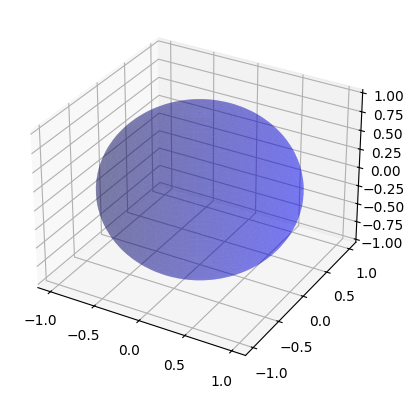

In [ ]:

def sphere(u, v):
    r = 1
    x = r * np.cos(u) * np.sin(v)
    y = r * np.sin(u) * np.sin(v)
    z = r * np.cos(v)
    return x, y, z

u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
u, v = np.meshgrid(u, v)
x, y, z = sphere(u, v)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, color='b', alpha=0.3)
plt.show()


## **Curvas en el espacio**

---

<div align="justify">

Una curva en el espacio es una función continua definida desde un intervalo de números reales hacia un espacio.
En geometría diferencial, se estudian curvas suaves, las cuales tienen derivadas continuas hasta un orden deseado.
</div>

---

**📥Importaciones📦**

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

**👨‍💻Implementación👩‍💻**

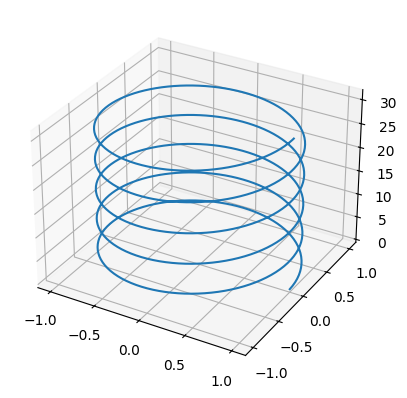

In [ ]:

def helix(t):
    x = np.cos(t)
    y = np.sin(t)
    z = t
    return x, y, z

t = np.linspace(0, 10 * np.pi, 1000)
x, y, z = helix(t)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
plt.show()

## **Vector Tangente y espacio Tangente**

---

<div align="justify">

El espacio tangente en un punto de una variedad es el espacio vectorial que contiene todas las direcciones posibles en las que se puede pasar tangencialmente a través del punto.
Los vectores tangentes son los elementos de este espacio.

</div>

---

**📥Importaciones📦**

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

**👨‍💻Implementación👩‍💻**

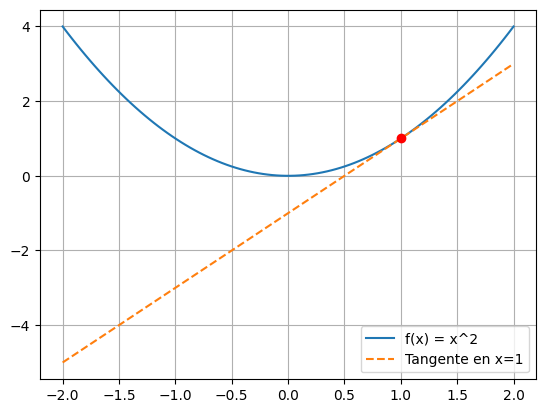

In [ ]:

def f(x):
    return x**2

def tangent_line(x0, x):
    y0 = f(x0)
    slope = 2 * x0
    return slope * (x - x0) + y0

x = np.linspace(-2, 2, 100)
y = f(x)

x0 = 1
y0 = f(x0)

plt.plot(x, y, label='f(x) = x^2')
plt.plot(x, tangent_line(x0, x), '--', label=f'Tangente en x={x0}')
plt.plot(x0, y0, 'ro')
plt.legend()
plt.grid(True)
plt.show()

## **Curvatura de Curvas Planas**

---

<div align="justify">

La curvatura mide qué tan rápido cambia de dirección una curva.
Para una curva plana, la curvatura se define como la tasa de cambio del vector tangente respecto al largo de arco.

</div>

---

**📥Importaciones📦**

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

**👨‍💻Implementación👩‍💻**

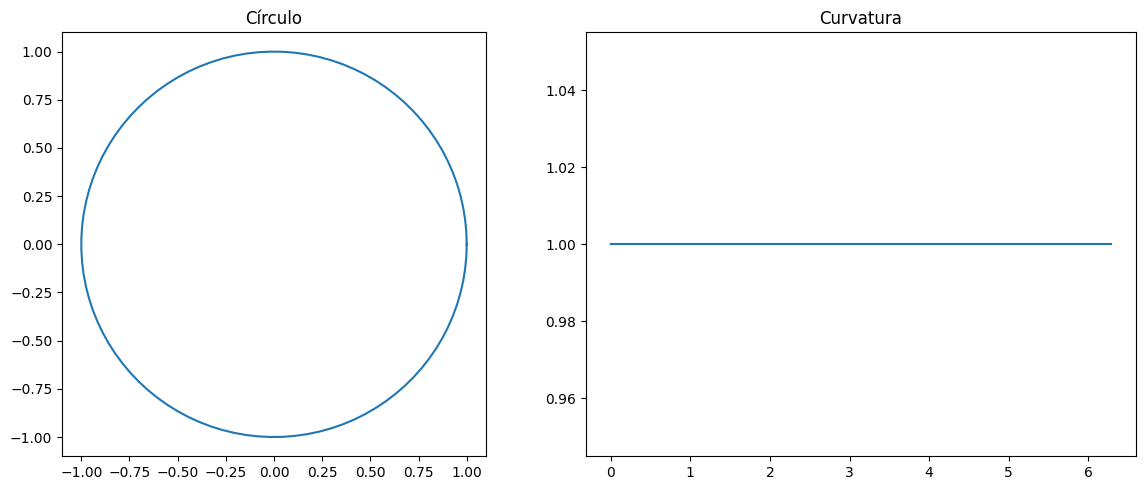

In [ ]:

def circle(t, r=1):
    return r * np.cos(t), r * np.sin(t)

def curvature(t, r=1):
    return np.full_like(t, 1 / r)

t = np.linspace(0, 2 * np.pi, 100)
x, y = circle(t)
k = curvature(t)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(x, y)
ax1.set_aspect('equal')
ax1.set_title('Círculo')

ax2.plot(t, k)
ax2.set_title('Curvatura')

plt.tight_layout()
plt.show()

## **Marco de Frenet-Serret**

---

<div align="justify">

El marco de Frenet-Serret es un sistema de referencia móvil formado por tres vectores ortonormales, que se utiliza para describir una curva de manera local en cada punto.
Consiste en los vectores unitarios:

- Tangente ($\mathbf{T}$),

- Normal ($\mathbf{N}$),

- Binormal ($\mathbf{B}$),

que definen el comportamiento geométrico de la curva en el espacio.

</div>

---

**📥Importaciones📦**

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

**👨‍💻Implementación👩‍💻**

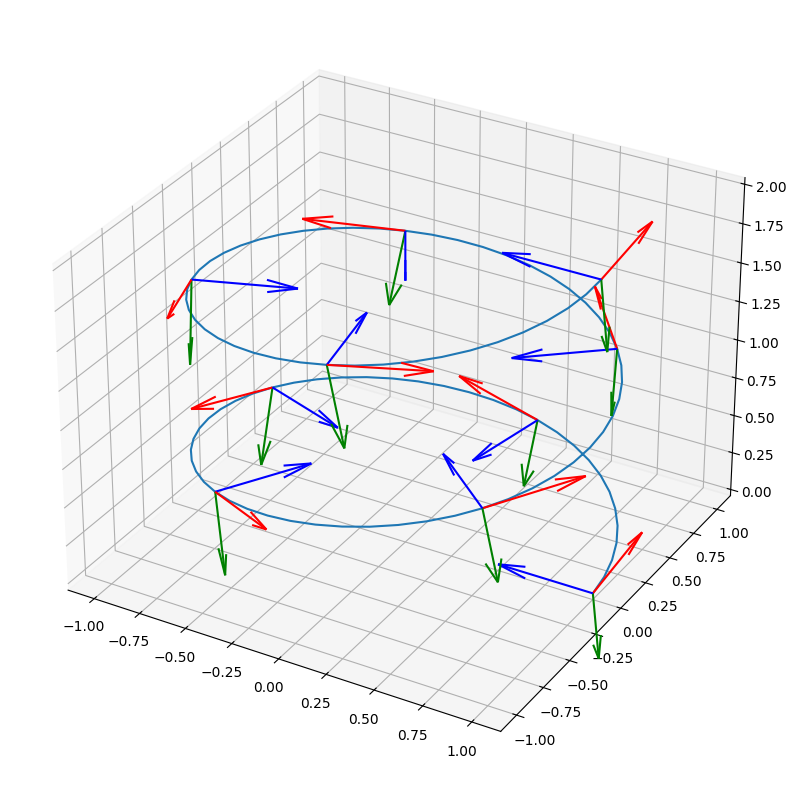

In [ ]:

def helix(t):
    x = np.cos(t)
    y = np.sin(t)
    z = t / (2 * np.pi)
    return np.array([x, y, z])

def frenet_frame(t):
    r = helix(t)
    T = np.array([-np.sin(t), np.cos(t), 1 / (2 * np.pi)])
    T = T / np.linalg.norm(T)
    B = np.array([-np.cos(t), -np.sin(t), 0])
    N = np.cross(B, T)
    return T, N, B

t = np.linspace(0, 4 * np.pi, 100)
points = np.array([helix(ti) for ti in t])

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(*points.T)

for ti in np.linspace(0, 4 * np.pi, 10):
    T, N, B = frenet_frame(ti)
    r = helix(ti)
    ax.quiver(*r, *T, color='r', length=0.5)
    ax.quiver(*r, *N, color='g', length=0.5)
    ax.quiver(*r, *B, color='b', length=0.5)

plt.show()

## **Superficies y Parametrizaciones**

---

<div align="justify">

Una superficie es una variedad bidimensional embebida en el espacio tridimensional.
Las parametrizaciones permiten describir superficies usando dos parámetros independientes, generalmente denotados por $u$ y $v$.

</div>

---

**📥Importaciones📦**

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

**👨‍💻Implementación👩‍💻**

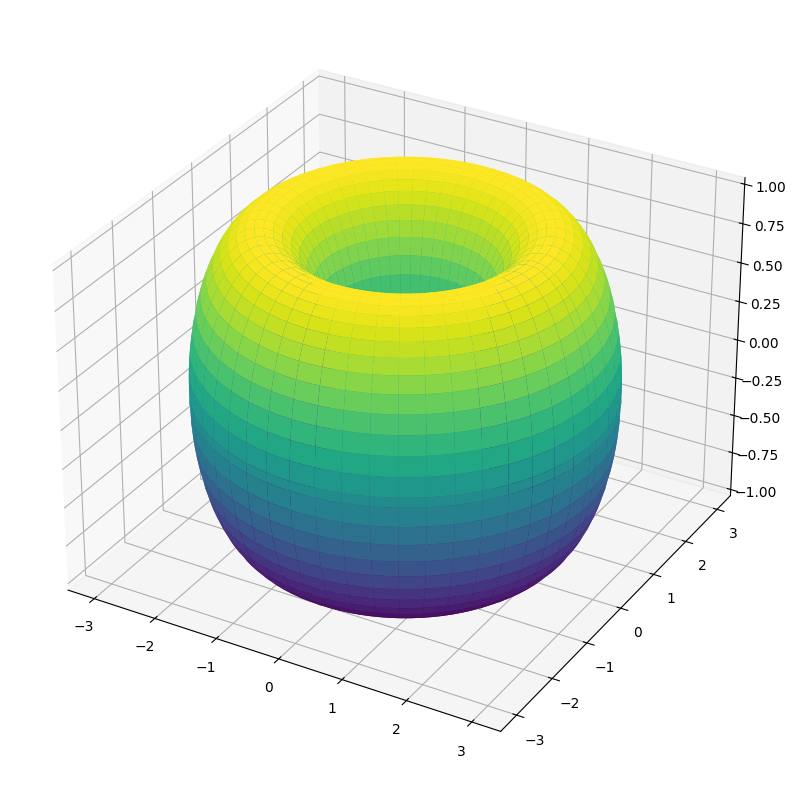

In [ ]:

def torus(u, v, R=2, r=1):
    x = (R + r * np.cos(v)) * np.cos(u)
    y = (R + r * np.cos(v)) * np.sin(u)
    z = r * np.sin(v)
    return x, y, z

u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, 2 * np.pi, 100)
u, v = np.meshgrid(u, v)
x, y, z = torus(u, v)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')
plt.show()

## **Primera Forma Fundamental**

---

<div align="justify">

La primera forma fundamental es una forma cuadrática que permite realizar mediciones en una superficie (como longitudes y ángulos) sin referirse al espacio ambiente.
Contiene la información métrica local de la superficie mediante los coeficientes $E$, $F$, y $G$ de la métrica inducida por la parametrización.

Este script computa simbólicamente los coeficientes $E$, $F$ y $G$ para una esfera parametrizada, los cuales determinan las métricas locales como:

$$
\mathrm{I} = E\,du^2 + 2F\,du\,dv + G\,dv^2
$$


</div>

---

**📥Importaciones📦**

In [ ]:

import numpy as np
import sympy as sp

**👨‍💻Implementación👩‍💻**

In [ ]:

u, v = sp.symbols('u v')


x = sp.sin(u) * sp.cos(v)
y = sp.sin(u) * sp.sin(v)
z = sp.cos(u)


xu = sp.diff(x, u)
xv = sp.diff(x, v)
yu = sp.diff(y, u)
yv = sp.diff(y, v)
zu = sp.diff(z, u)
zv = sp.diff(z, v)


E = xu**2 + yu**2 + zu**2
F = xu*xv + yu*yv + zu*zv
G = xv**2 + yv**2 + zv**2


print("Primera Forma Fundamental:")
print(f"E = {E}")
print(f"F = {F}")
print(f"G = {G}")

Primera Forma Fundamental:
E = sin(u)**2 + sin(v)**2*cos(u)**2 + cos(u)**2*cos(v)**2
F = 0
G = sin(u)**2*sin(v)**2 + sin(u)**2*cos(v)**2


## **Curvatura de Gauss**

---

<div align="justify">


La curvatura de Gauss es una medida intrínseca de curvatura que depende únicamente de cómo está curvada una superficie, sin necesidad de referirse al espacio ambiente.
Refleja la geometría interna de la superficie y se puede calcular a partir de la primera y segunda forma fundamental.

</div>

---

**📥Importaciones📦**

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

**👨‍💻Implementación👩‍💻**

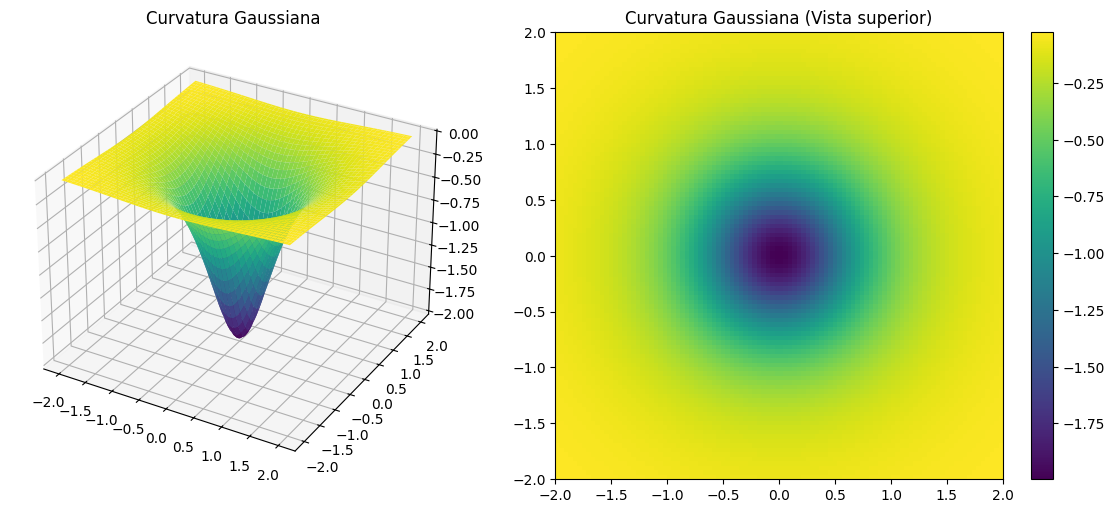

In [ ]:

def gaussian_curvature(x, y):
    return -2 / (1 + x**2 + y**2)**2

x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = gaussian_curvature(X, Y)

fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis')
ax1.set_title('Curvatura Gaussiana')
ax2 = fig.add_subplot(122)
im = ax2.imshow(Z, extent=[-2, 2, -2, 2], origin='lower', cmap='viridis')
plt.colorbar(im)
ax2.set_title('Curvatura Gaussiana (Vista superior)')

plt.tight_layout()
plt.show()

## **Curvatura Media**

---

<div align="justify">

La curvatura media es una medida extrínseca de curvatura que depende de cómo la superficie está embebida en el espacio tridimensional.
Se define como el promedio de las curvaturas principales en un punto de la superficie.

</div>

---

**📥Importaciones📦**

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

**👨‍💻Implementación👩‍💻**

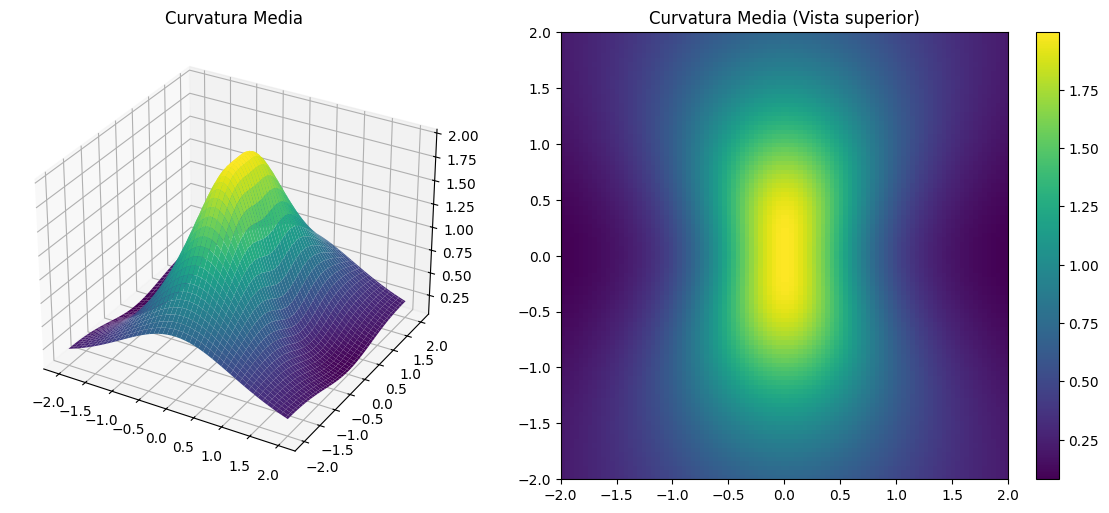

In [ ]:

def mean_curvature(x, y):
    return 2 * (1 + y**2 + y**2) / (1 + x**2 + y**2)**2

x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = mean_curvature(X, Y)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis')
ax1.set_title('Curvatura Media')

ax2 = fig.add_subplot(122)
im = ax2.imshow(Z, extent=[-2, 2, -2, 2], origin='lower', cmap='viridis')
plt.colorbar(im)
ax2.set_title('Curvatura Media (Vista superior)')

plt.tight_layout()
plt.show()

## **Geodésicas**

---

<div align="justify">

Las geodésicas son curvas sobre una superficie que minimizan localmente la distancia entre dos puntos.
Son la generalización de las líneas rectas en espacios curvos, y representan el camino más corto entre dos puntos en una superficie.

</div>

---

In [ ]:

!pip install geomstats

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 60.7 MB/s eta 0:00:00


**📥Importaciones📦**

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import geomstats.backend as gs
import geomstats.datasets.utils as data_utils
from geomstats.geometry.pre_shape import PreShapeSpace
from geomstats.visualization import KendallDisk, KendallSphere

%matplotlib inline

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


**👨‍💻Implementación👩‍💻**

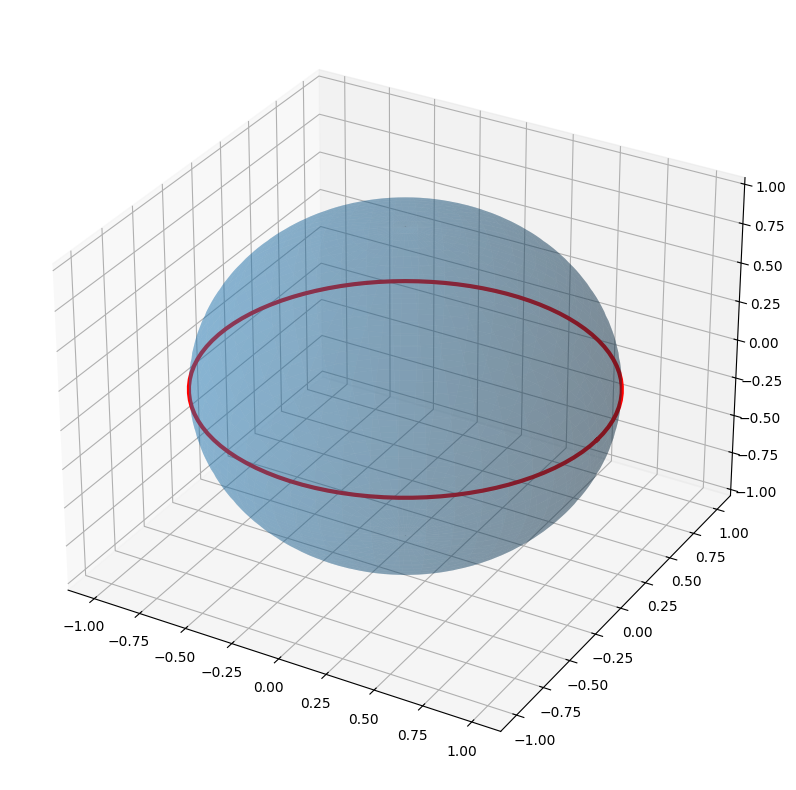

In [ ]:

def sphere(u, v):
    x = np.sin(u) * np.cos(v)
    y = np.sin(u) * np.sin(v)
    z = np.cos(u)
    return x, y, z

def geodesic(t):
    return np.pi / 2, t  # línea de longitud sobre la esfera

u = np.linspace(0, np.pi, 100)
v = np.linspace(0, 2 * np.pi, 100)
U, V = np.meshgrid(u, v)
X, Y, Z = sphere(U, V)

t = np.linspace(0, 2 * np.pi, 100)
u_geo, v_geo = geodesic(t)
X_geo, Y_geo, Z_geo = sphere(u_geo, v_geo)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.3)
ax.plot(X_geo, Y_geo, Z_geo, color='r', linewidth=3)
plt.show()

**👨‍💻Implementación👩‍💻**

In [ ]:

ambient_dim = 2
k_landmarks = 3
preshape_triangle_2d = PreShapeSpace(3, 2)
preshape_triangle_2d.equip_with_group_action("rotations")
preshape_triangle_2d.equip_with_quotient()

**Espacio de Preformas y Representación de Marcos sobre la Esfera**

In [ ]:

S = KendallSphere()

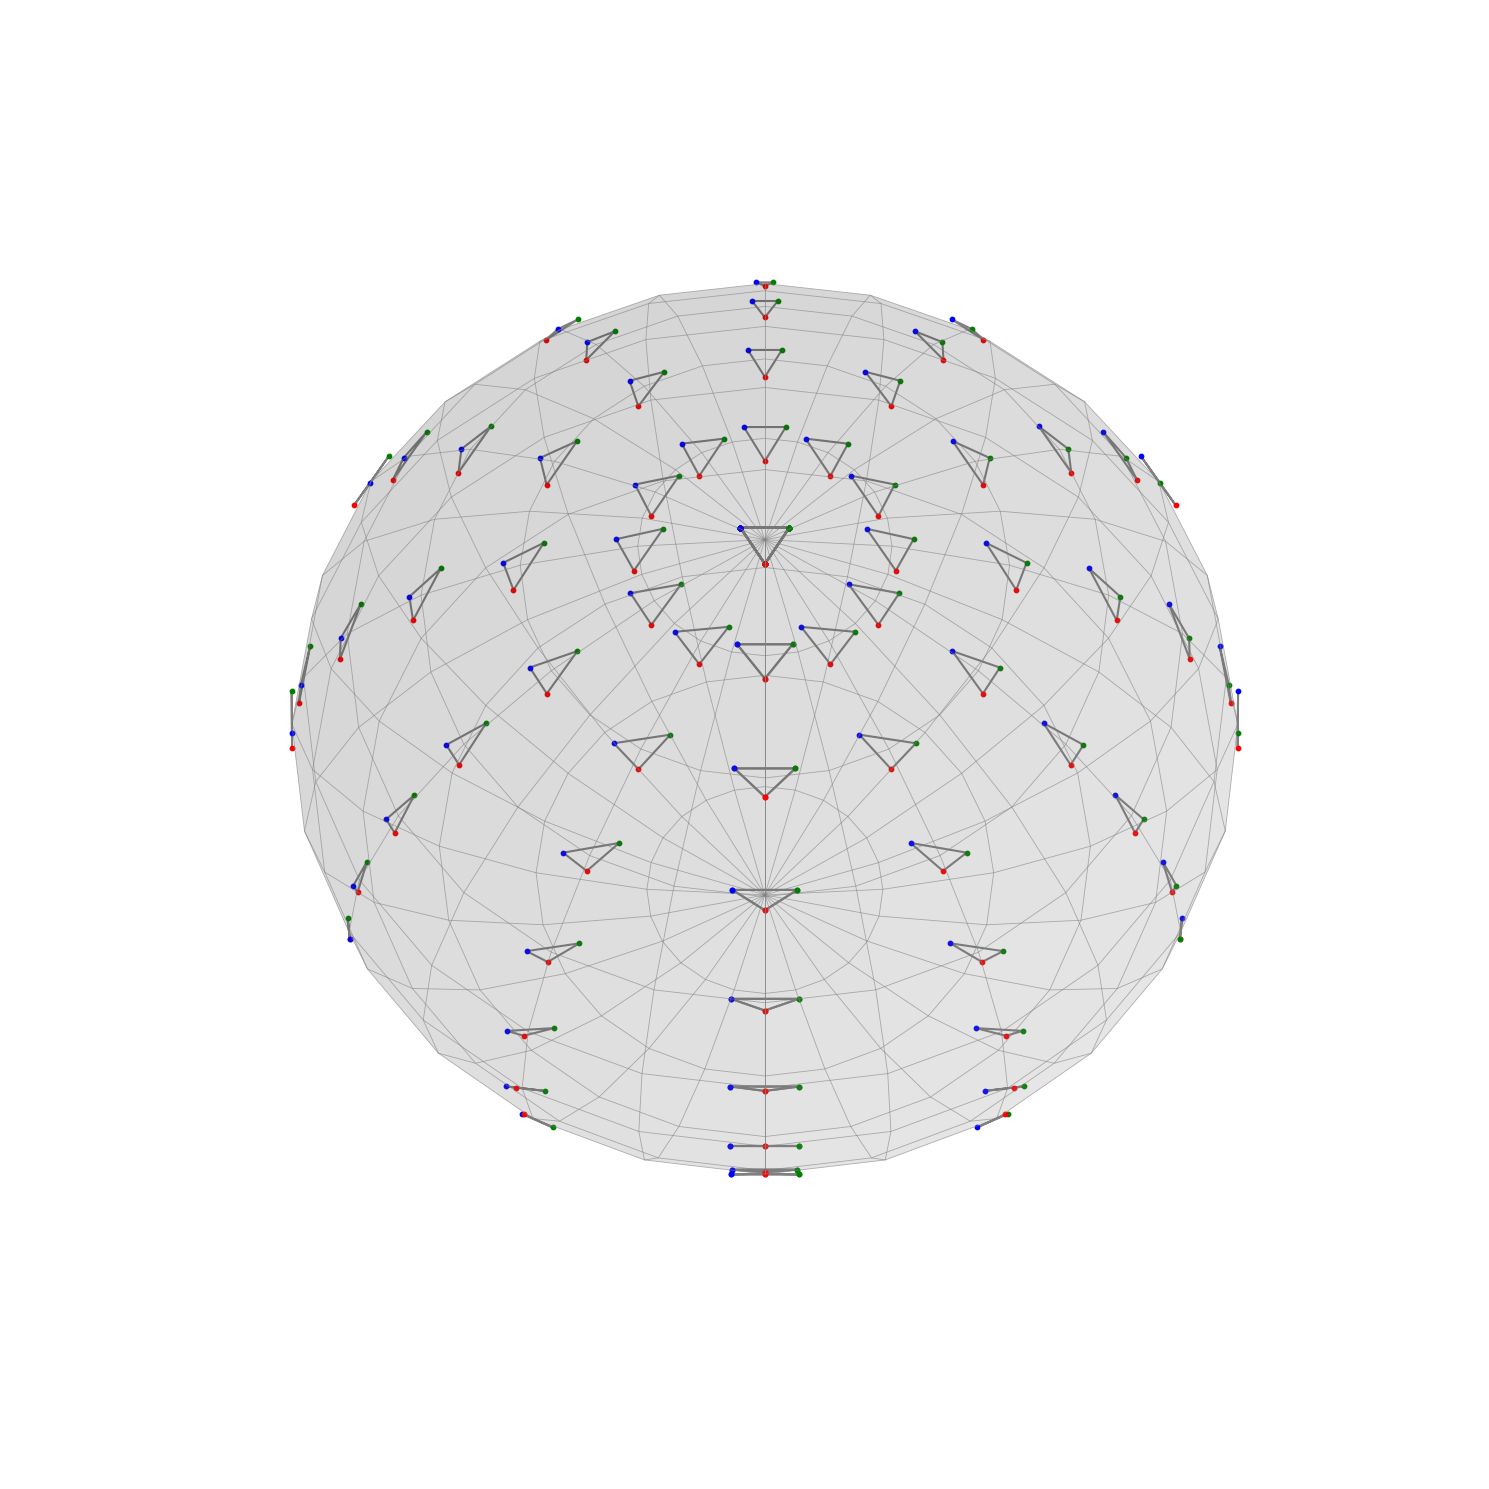

In [ ]:

fig = plt.figure(figsize=(15, 15))
S.draw()

## **Transporte Paralelo**

---

<div align="justify">

El transporte paralelo es un método para transportar información geométrica a lo largo de una curva sobre una variedad.
Este proceso preserva el producto interno entre vectores y se utiliza para comparar vectores en distintos puntos de la variedad.

</div>

---

**📥Importaciones📦**

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

**👨‍💻Implementación👩‍💻**

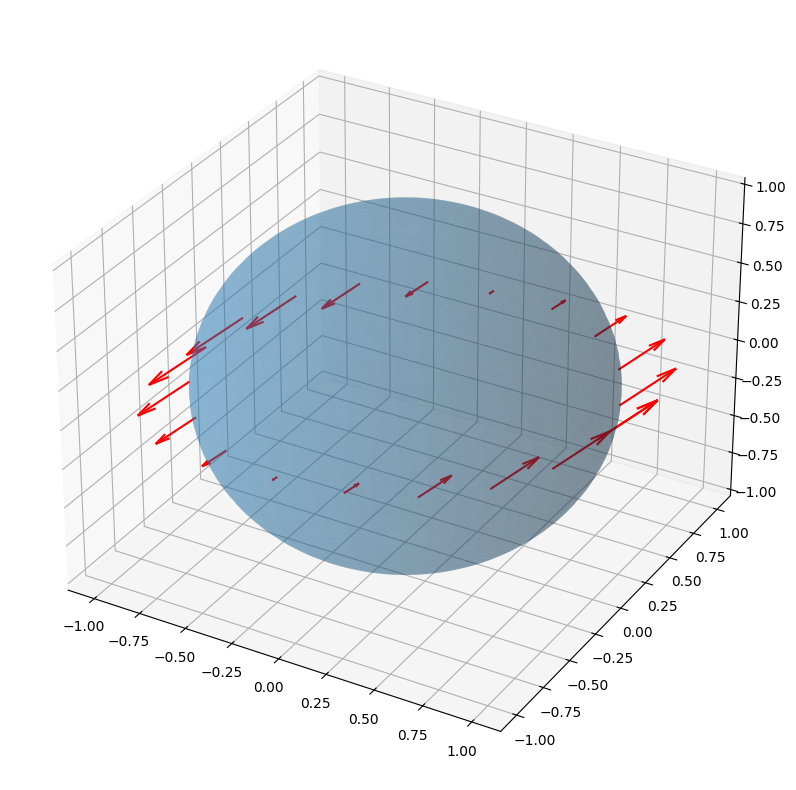

In [ ]:

def sphere(u, v):
    x = np.sin(u) * np.cos(v)
    y = np.sin(u) * np.sin(v)
    z = np.cos(u)
    return x, y, z

def parallel_transport(t, v0):
    u = np.pi / 2
    x = np.cos(t)
    y = np.sin(t)
    z = np.zeros_like(t)

    r = np.array([x, y, z])
    T = np.array([-y, x, np.zeros_like(t)])
    B = np.array([np.zeros_like(t), np.zeros_like(t), 1])
    N = np.cross(B, T)

    return x * v0[0] + y * v0[1] + v0[2] * N


u = np.linspace(0, np.pi, 100)
v = np.linspace(0, 2*np.pi, 100)
U, V = np.meshgrid(u, v)
X, Y, Z = sphere(U, V)


t = np.linspace(0, 2*np.pi, 20)
v0 = np.array([1, 0, 0])
vectors = [parallel_transport(ti, v0) for ti in t]
points = [sphere(np.pi/2, ti) for ti in t]
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.3)

for point, vector in zip(points, vectors):
    ax.quiver(*point, *vector, color='r', length=0.2)

plt.show()